# Bike Rental in Seoul

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

The dataset used in this assignment was collected to help predict the demand for bike rental in Seoul at any given day and time. It can be found in the University of California Irvine [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

The goal of this assignment is to preprocess the input variables into a format that makes them most useful for a linear regression model.

To begin with, let's import the necessary libraries and read in the data:

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.rcParams["figure.dpi"] = 120

data = pd.read_csv("data/seoul_bike_data.csv") 

## Initial data inspection

Now that we have the dataset loaded in, let's inspect it with the methods `.info()` and `.head()`. 

Note that the variable `Rented Bike Count` is the target variable we are aiming to predict in this assignment.

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8743 non-null   object 
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [82]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,30%-70%,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,30%-70%,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,30%-70%,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,30%-70%,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,30%-70%,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


As we can see, there are a lot of different variables which take very different ranges, very different units, and, accordingly, have very different interpretations.

## Categorical vs. Continuous Variables

We must analyse each variable and decide how to preprocess it. Some variables are given in a discrete format, but it makes sense to make them continuous, and vice-versa. 

**Q1. Which variable columns are continuous quantities and which are categorical?**


Create two lists, `categorical` and `continuous` which contain the column indices for the categorical and continuous fields, respectively.

In [83]:
# for i, s in enumerate(data.columns):
#     print(i, s)

In [5]:
# Add your code below
categorical = [0, 4, 11, 12, 13]
continuous = [1, 2, 3, 5, 6, 7, 8, 9, 10] 


**Q2. Transform the `Date` variable to a continuous value.**


The `Date` variable could be informative about a trend over time, and can be interpreted as a continuous variable for time. 

Using `.copy()`, create a copy of `data` called `data_date`. 

From `data_date`, create a new variable containing the values of the `Date` column, but converted to a datetime format (using `pd.to_datetime`). Be sure to specify `format="%d/%m/%Y"` otherwise `pandas` may incorrectly parse the dates.

Next, compute **the number of days** between each of these dates and the reference date `01/01/2017` and assign this to a new column in `data_date` called `DayCount`.


Leave the `Date` column unchanged.

*Hint: use the `pd.to_datetime()` function and subtract the values in the `Date` column from the reference date.*

In [113]:
# Add your code below

reference_date = pd.to_datetime('2017-01-01')

print(type(reference_date))

data_date = data.copy()
datetimes = pd.to_datetime(data_date['Date'], format = "%d/%m/%Y")

data_date["DayCount"] = (datetimes - reference_date).dt.days

data_date.head()


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DayCount
0,01/12/2017,254,0,-5.2,30%-70%,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,334
1,01/12/2017,204,1,-5.5,30%-70%,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,334
2,01/12/2017,173,2,-6.0,30%-70%,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,334
3,01/12/2017,107,3,-6.2,30%-70%,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,334
4,01/12/2017,78,4,-6.0,30%-70%,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,334


**Q3. Create a new DataFrame with the one-hot representation of the season**


Categorical variables must be formatted to a one-hot representation to be ready for a linear regression model. Create $4$ new columns with the one-hot representation of the Seasons (`Spring`, `Summer`, `Autumn`, and `Winter`, in this order.)

Before starting, create a copy of `data_date` called `data_season` using the `.copy()` method.

*Hint: for each new column we will have rows with values `True` or `False`. To get these values, you can compare the value of the `Seasons` column to that of the new column of interest.*

*In other words the new columns will look like:*

...|Seasons|...|Spring|Summer|Autumn|Winter
---|---|---|---|---|---|---
...|Autumn|...|False|False|True|False
...|Spring|...|True|False|False|False

In [114]:
# Add your code below
data_season = data_date.copy()
# data_season = pd.get_dummies(data_season, columns= ['Seasons'], prefix="", prefix_sep="", )
data_season["Spring"] = data_season['Seasons'] == 'Spring'
data_season["Summer"] = data_season['Seasons'] == "Summer"
data_season["Autumn"] = data_season['Seasons'] == "Autumn"
data_season["Winter"] = data_season['Seasons'] == "Winter"


data_season.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DayCount,Spring,Summer,Autumn,Winter
0,01/12/2017,254,0,-5.2,30%-70%,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,334,False,False,False,True
1,01/12/2017,204,1,-5.5,30%-70%,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,334,False,False,False,True
2,01/12/2017,173,2,-6.0,30%-70%,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,334,False,False,False,True
3,01/12/2017,107,3,-6.2,30%-70%,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,334,False,False,False,True
4,01/12/2017,78,4,-6.0,30%-70%,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,334,False,False,False,True


Once you have implemented the above, uncomment and run the cell below:

In [8]:
data_season.sample(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,date_new,DayCount,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
6838,11/09/2018,1868,22,21.6,30%-70%,1.9,2000,11.3,0.00,0.0,0.0,No Holiday,Yes,2018-09-11,618,1,0,0,0
6882,13/09/2018,3146,18,26.7,30%-70%,1.8,2000,17.1,0.47,0.0,0.0,No Holiday,Yes,2018-09-13,620,1,0,0,0
6398,24/08/2018,152,14,24.4,>70%,2.9,250,23.1,0.26,1.5,0.0,No Holiday,Yes,2018-08-24,600,0,0,1,0


**Q4. Transform the categorical `Humidity(%)` variable into a continuous quantity.**


In some cases variables are given as discrete categories, but are representing ranges of a continuous values, for example the variable `Humidity(%)`.

Using `.copy()`, create a copy of `data_season` called `data_humidity`. 

Transform the variable `Humidity(%)` to a continuous quantity. Use the mean value of each category as its continuous value (e.g. if a category is "10%-20%", replace it with 15).

If the value of the category is ">70%", use 85 as its mean value. Similarly, if it is "<30%", use 15 as its mean value.

Keep the same column name.

*Hint: You may want to use the `df.replace()` method.*

In [88]:
humidity = {'30%-70%': 50,
            '>70%': 85,
           '<30%':15 }

In [89]:
# Add your code below
data_humidity = data_season.copy()

data_humidity['Humidity(%)'] = data_humidity['Humidity(%)'].replace(humidity)


Once you have implemented `data_humidity`, uncomment and run the following cell:

In [11]:
data_humidity["Humidity(%)"].value_counts()

50.0    5413
85.0    2612
15.0     718
Name: Humidity(%), dtype: int64

## Normalisation

Let us inspect the distribution of the continuous variables.

Use the method `.describe()` to produce some basic statistics.

In [91]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Q5. Visualize the distribution of continuous variables.**


Inspect the histograms of the continuous variables in our data using the `.hist()` method. Assign the plot to a variable called `continuous_fig`.

Note that since we have only been altering categorical variables so far, you should use the original `data` DataFrame in this question.

*Hint: use the method `plt.tight_layout()` after calling `.hist()` to create a better arrangement of subplots.*

<Figure size 768x576 with 0 Axes>

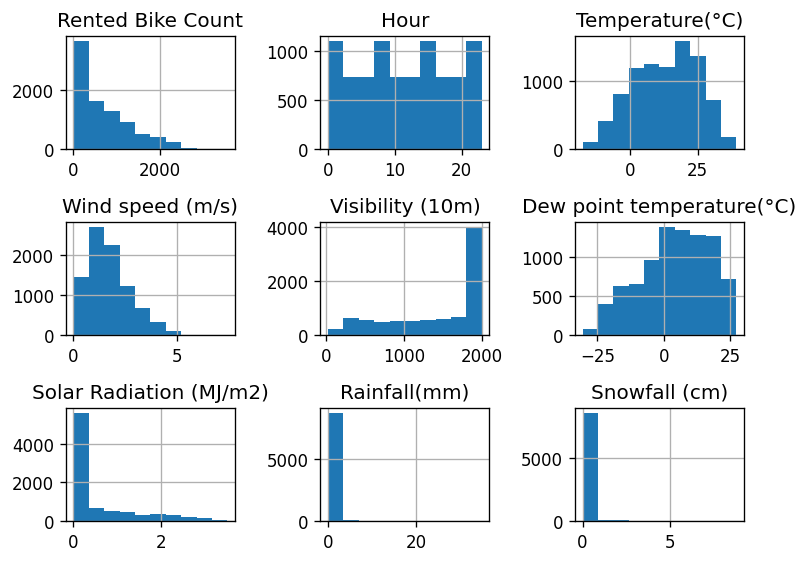

In [117]:
# We create a new figure to make other figures in the notebook don't get modified
# plt.figure()
plt.figure()

# numeric_col = data.describe().columns

# for i, col in enumerate(numeric_col):
#     ax = plt.subplot(3, 3, i+1)
#     data[col].hist(ax=ax)
#     ax.set_title(col)

# plt.tight_layout()

# plt.show()
# Add your code below
continuous_fig = data.iloc[:, continuous].hist()
plt.tight_layout()


**Q6. Convert continuous variables into categorical variables.**


Note that in the histograms above, these continuous variables have very distinct distribution profiles. For instance, some variables have a very high frequency for a specific value (e.g. zero Solar Radiation). 

It might be useful to have such distinctive values as additional categorical variables.

Create a new DataFrame with four additional columns with the binary variables for values that occur particularly often in the variables `Solar Radiation`, `Snowfall`, `Rainfall` and `Visibility`. 
Create the new columns called `Zero Solar Radiation`, `Zero Snowfall`, `Zero Rainfall` and `Max Visibility`, in this order. 

For instance, the binary variable `Zero Solar Radiation` will indicate if `Solar Radiation` is _close to_ zero (in this question, if it is smaller than 0.1). The same is true for columns `Zero Snowfall` and `Zero Rainfall`.

Since the most common `Visibility` value is not zero, the binary variable `Max Visibility` will indicate if `Visibility` is _close to_ its maximum value (i.e. if its value is greater than its max value - 0.1).

First, however, create a copy of `data_humidity` using the `.copy()` method. Call your new DataFrame `data_binary`.

In [123]:
# Add your code below
data_binary = data_humidity.copy()
data_binary["Zero Solar Radiation"] = data['Solar Radiation (MJ/m2)'].apply(lambda x: True if x < 0.1 else False)
data_binary["Zero Snowfall"] = data['Snowfall (cm)'].apply(lambda x: True if x < 0.1 else False)
data_binary["Zero Rainfall"] = data['Rainfall(mm)'].apply(lambda x: True if x < 0.1 else False)
data_binary["Max Visibility"] = data['Visibility (10m)'] > (data['Visibility (10m)'].max() - 0.1)

Once you have created these new columns, uncomment and run the following cell:

In [96]:
data_binary["Zero Solar Radiation"].value_counts()

True     4879
False    3881
Name: Zero Solar Radiation, dtype: int64

**Q7. Normalise variables.**


It is important to ensure that input data are all scaled to the same range. Without this, the model may produce inaccurate predictions. Normalising each input variable can help train the model, allow easier interpretation of the learned parameters, and offer better regularisation.

Normalise each of the continuous variables in `data` to a *z-scored* DataFrame (such that each column has zero mean and unit variance). Use the transformation:

$$z = \frac{x - \mu}{\sigma}$$

Where `x` is the original column values, `μ` is the mean of the column, and `σ` is the standard deviation of the column.

Save the results in a different DataFrame, `data_z`, and visualise the new distributions using the `.hist()` and `plt.tight_layout()` methods.

Assign the plot to a variable called `normalise_fig`.

*Hint: use the `mean()` and `std()` methods for the chosen columns.*

In [137]:
def normalize(col):
    mean = col.mean()
    std = col.std()
    z = (col - mean)/std
    return(z)

In [138]:
data_z = data.copy()
# normalize(data['Rented Bike Count'])

<Figure size 960x720 with 0 Axes>

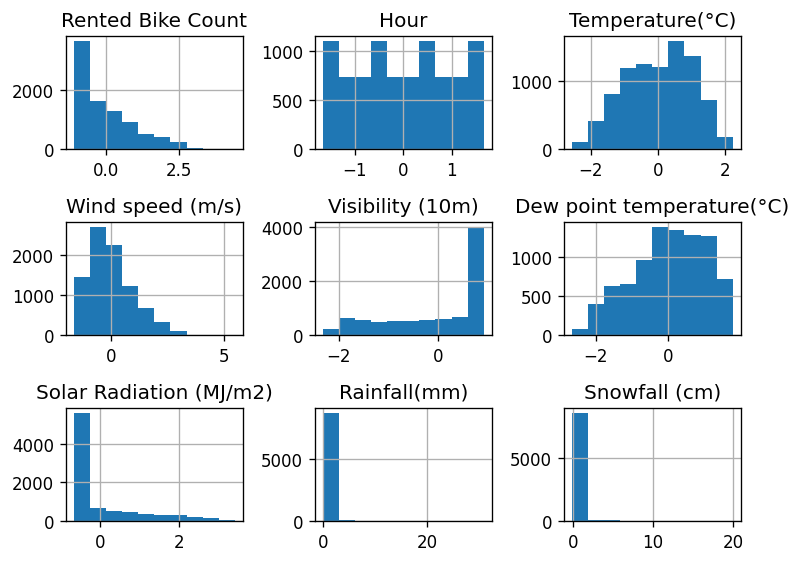

In [141]:
plt.figure(figsize=(8, 6))

numeric_col = data.iloc[:, continuous]

# for i, col in enumerate(numeric_col):
#     ax = plt.subplot(3, 3, i+1)
#     data_z[col] = normalize(data_z[col])
#     data_z[col].hist(ax=ax)
#     ax.set_title(col)

# No need of a for loop because I can just pass the data into normalize function and get same results
data_z = normalize(numeric_col)

normalise_fig = data_z.hist()

plt.tight_layout()

plt.show()

In [142]:
# We create a new figure to make other figures in the notebook don't get modified

# Add your code below
# data_z = ...
# normalise_fig = ...

data_z.head()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,-0.698611,-1.661230,-1.513871,0.458450,0.925818,-1.659510,-0.655094,-0.131792,-0.171881
1,-0.776130,-1.516775,-1.538986,-0.892511,0.925818,-1.659510,-0.655094,-0.131792,-0.171881
2,-0.824192,-1.372320,-1.580845,-0.699516,0.925818,-1.667167,-0.655094,-0.131792,-0.171881
3,-0.926518,-1.227866,-1.597589,-0.796013,0.925818,-1.659510,-0.655094,-0.131792,-0.171881
4,-0.971480,-1.083411,-1.580845,0.554947,0.925818,-1.736077,-0.655094,-0.131792,-0.171881


## Advanced discretisation

**Q8. Discretising a circular variable.**


Some continuous variables are not actually linear variables, and are not a natural input to a linear model. For example, `Hour` is a circular variable - the values 23 and 1 are actually close together in the day. 

Let us transform `Hour` into discrete categories.  Divide the variable into 5 categories: `Morning` (6-10), `Afternoon` (11-16), `Evening` (17-19), `Night` (20-23), `Early Morning` (0-5).

For example:

...|Hour|...|Morning|Afternoon|Evening|Night|Early Morning
---|---|---|---|---|---|---|---
...|1|...|False|False|False|False|True
...|13|...|False|True|False|False|False


First, however, create a copy of `data_binary` using the `.copy()` method. Call your new DataFrame `data_time_categories`.

In [102]:
# Add your code below
pd.set_option('display.max_rows', 20)

data_time_categories = data_binary.copy()
data_time_categories["Morning"] = data_time_categories['Hour'].apply(lambda x: True if x >= 6 and x <= 10 else False)
data_time_categories["Afternoon"] = data_time_categories['Hour'].apply(lambda x: True if x >= 11 and x <= 16 else False)
data_time_categories["Evening"] = data_time_categories['Hour'].apply(lambda x: True if x >= 17 and x <= 19 else False)
data_time_categories["Night"] = data_time_categories['Hour'].apply(lambda x: True if x >= 20 and x <= 23 else False)
data_time_categories["Early Morning"] = data_time_categories['Hour'].apply(lambda x: True if x >= 0 and x <= 5 else False)

# ...


Once you have implemented the above question, uncomment and run the following cell:

In [103]:
data_time_categories["Morning"].value_counts()

False    6935
True     1825
Name: Morning, dtype: int64

**Q9. Inspecting target variable dependency.**


The categories chosen above for `Hour` were rather arbitrary. One more advanced data preprocessing step is to inspect how a given input variable influences the target variable. 

Let's use the `seaborn` library to plot this dependency in detail - how the target variable `Rented Bike Count` depends on `Hour` - with the `sns.violinplot()` method. It shows the distribution of bike rentals for each hour of the day. Assign the output of the plot to a variable called `bike_hour_dependency`. For input data, use the `data` DataFrame.

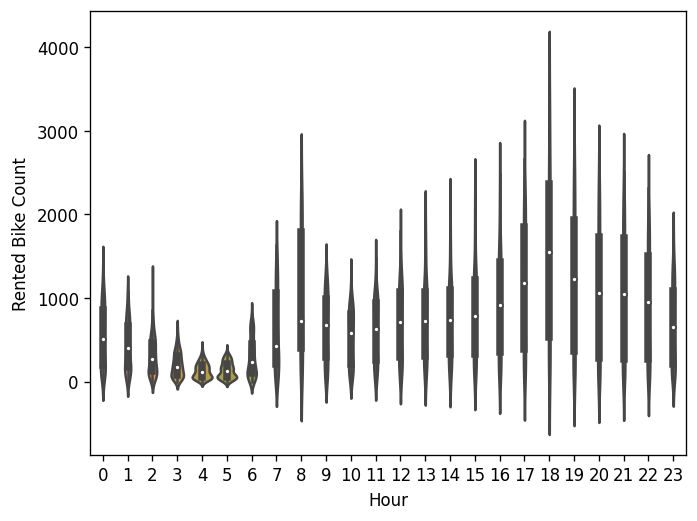

In [104]:
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()

# Add your code below
bike_hour_dependency = sns.violinplot(data=data, y=data['Rented Bike Count'], x=data['Hour']);


We can see that there is complex relation between the variables. Note that as linear models are only sensitive to the mean correlation between variables (not the full distribution), we can focus on the mean values.

**Q10. Calculate the mean `Rented Bike Count` for each hour of the day.**


Use the methods `.groupby()` and `.mean()` on the `data` DataFrame, save the result to a variable called `mean_count`, and plot the result using `.plot()`.

<AxesSubplot:xlabel='Hour'>

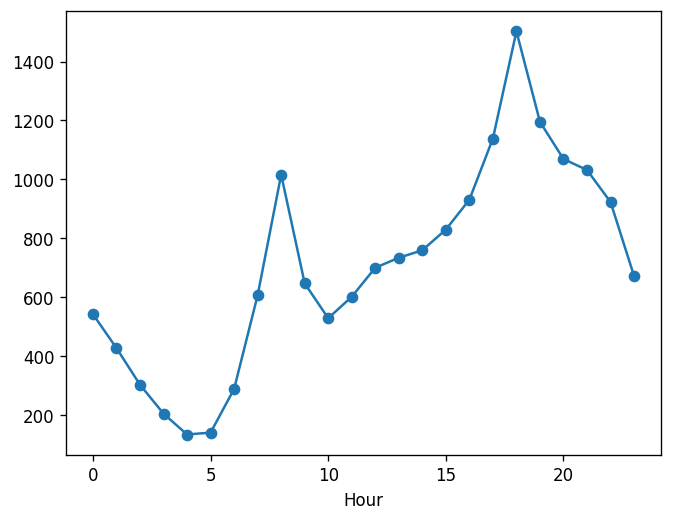

In [105]:
# Add your code below
mean_count = data.groupby(['Hour'])['Rented Bike Count'].mean()
mean_count.plot(marker='o')


**Q11. Discretise nonlinear dependency.**


We see in the plot above, a highly nonlinear effect of the variable `Hour` on the mean of the target variable `Rented Bike Count`. A linear model is not sensitive to this and it is a strong indication that discretisation of the variable will help. As above, let's create categorical variables for different ranges of `Hour`, but now taking into account the dependency of the target variable.

We expect that a category will be more predictive if the target does not vary too much for samples of that category. For instance, the target value is similar for the hours 10, 11, 12 and 13, indicating that the range `10 <= Hour < 14` might have good predictive power for the target.

Divide `Hour` into five new columns as follows:

New column name | Data
---|---
Hour Cat 1 | `3 <= Hour < 7`
Hour Cat 2 | `7 <= Hour < 10`
Hour Cat 3 | `10 <= Hour < 14`
Hour Cat 4 | `14 <= Hour < 22`
Hour Cat 5 | `22 <= Hour` or `Hour < 3`
 
Which will look like:

...|Hour|...|Hour Cat 1|Hour Cat 2|Hour Cat 3|Hour Cat 4|Hour Cat 5
---|---|---|---|---|---|---|---
...|2|...|False|False|False|False|True
...|9|...|False|True|False|False|False

First, create a copy of `data_time_categories` using the `.copy()` method. Call your new DataFrame `final_data`.

In [106]:
# Add your code below
pd.set_option('display.max_rows', 50)
final_data = data_time_categories.copy()
final_data["Hour Cat 1"] = final_data['Hour'].apply(lambda x: True if 3 <= x < 7 else False)
final_data["Hour Cat 2"] = final_data['Hour'].apply(lambda x: True if 7 <= x < 10 else False)
final_data["Hour Cat 3"] = final_data['Hour'].apply(lambda x: True if 10 <= x < 14 else False)
final_data["Hour Cat 4"] = final_data['Hour'].apply(lambda x: True if 14 <= x < 22 else False)
final_data["Hour Cat 5"] = final_data['Hour'].apply(lambda x: True if x >= 22 or x < 3 else False)
# final_data[['Hour', 'Hour Cat 5']]


,Hour,Hour Cat 5
0,0,True
1,1,True
2,2,True
3,3,False
4,4,False
...,...,...
8755,19,False
8756,20,False
8757,21,False
8758,22,True


Notice that in this case an hour-by-hour division may even be reasonable. But on the other hand, too many input variables can lead to overfitting problems.

## Evaluating predictions

**Q12. Implement linear regression model.**


Create a function with a single argument `cols`, which takes as input a `list` of column names to be used to train the model.

You will need to assign these columns of the `final_data` DataFrame to a variable (`X`), assign the `Rented Bike Count` column to another variable (`Y`), and then use the `.fit()` method of the `LinearRegression` class to train your model.

Note that you will have to reshape your `Y` variable using the `.reshape()` method. It is currently an array (`[254, 204, ...]`) but the `LinearRegression` model expects it as an _array of arrays_ (`[[254], [204], ...]`).

Finally, use the `mean_squared_error` to compute the error. Once computed, return the error as a `float`.

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Add your code below
def prediction_error(cols):
    linear_model = LinearRegression()
    X = final_data.loc[:, cols].values
    y = final_data.loc[:, 'Rented Bike Count'].values.reshape(-1, 1)

    linear_model.fit(X, y)
    Y_pred = linear_model.predict(X)
    error = mean_squared_error(Y_pred, y)
    return error


Uncomment and run the code below to check your implementation.

In [155]:
prediction_error(["Temperature(°C)"])

295323.04138856236

**Q13. Compare performance of different `Hour` representations.**


Compare the predictions of our linear model on the original `Hour` variable versus our hand-crafted categorical representations (`Hour Cat 1`, `Hour Cat 2` etc).

Assign the output of the `prediction_error()` function to two variables:
  1. `model1`: for just the `Hour` variable.
  2. `model2`: for the categorical representations that we created.

Which model has the better performance? Note that with `mean_squared_error`, a lower error indicates a better fit to the data.

In [157]:
# Add your code below
model1 = prediction_error(["Hour"])
model2 = prediction_error(["Hour Cat 1", "Hour Cat 2", "Hour Cat 3","Hour Cat 4","Hour Cat 5"])
print(model1)
print('We want to minimise the error and model 2 is slightly better than model 1')
print(model2)

345961.18287118233
We want to minimise the error and model 2 is slightly better than model 1
325919.5925871549


**Q14. Compare the prediction error based on the original variables to the prediction error for variables after preprocessing.**

1. Save to the variable `full_model_original`, the result of calling `prediction_error()` on the original columns which are suitable for a linear regression model. In this case these are `['Hour', 'Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']`.
<br><br>
2. Save to the variable `full_model_updated`, the result of calling `prediction_error()` using our processed variables. For `full_model_updated`, include the variables from `full_model_original` that we didn't preprocess (like `Temperature(°C)`, `Wind speed (m/s)` etc), but where we have processed a variable (like `Hour`), don't include the unprocessed variable.

In [164]:
# We compare the error from original data with the one with the additional columns we add and the error is lower meaning we did the right thing

In [166]:
# # Add your code below
full_model_original = prediction_error(['Hour', 'Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 
                                        'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'])

full_model_updated = prediction_error(['Hour', 'Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 
                                        'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
                                        'DayCount', "Hour Cat 1", "Hour Cat 2", "Hour Cat 3","Hour Cat 4","Hour Cat 5", 'Spring',
       'Summer', 'Autumn', 'Winter', 'Zero Solar Radiation', 'Zero Snowfall',
       'Zero Rainfall', 'Max Visibility','Morning', 'Afternoon', 'Evening',
       'Night', 'Early Morning'

])
print(full_model_original, full_model_updated)


221809.59060298427 169639.5015407951
